# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # crear graficos https://matplotlib.org/
import seaborn as sns # para crear graficos parecido a ggplot2 de R  https://seaborn.pydata.org/examples/index.html

#mutual information
# pip install -U scikit-learn
from sklearn.feature_selection import mutual_info_classif

##filtro multivariado-según BIC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# pip install statsmodels
import statsmodels.api as sm # calculo de regresion logistico mas estadistico tipo R con statsmodels

# #Filtro multivariado según RFE con random forest y SVM
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

#Filtro multivariado BORUTA
# pip install boruta 
from boruta import BorutaPy
from sklearn.preprocessing import StandardScaler

# Lectura de datos

In [2]:
misdatos = pd.read_csv('http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2023-03-15/visualisations/listings.csv')
misdatos.shape

(21239, 18)

In [3]:
misdatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21239 entries, 0 to 21238
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21239 non-null  int64  
 1   name                            21235 non-null  object 
 2   host_id                         21239 non-null  int64  
 3   host_name                       21236 non-null  object 
 4   neighbourhood_group             21239 non-null  object 
 5   neighbourhood                   21239 non-null  object 
 6   latitude                        21239 non-null  float64
 7   longitude                       21239 non-null  float64
 8   room_type                       21239 non-null  object 
 9   price                           21239 non-null  int64  
 10  minimum_nights                  21239 non-null  int64  
 11  number_of_reviews               21239 non-null  int64  
 12  last_review                     

In [4]:
# Mirar los valores perdidos o nans:
# Identificamos el número de missing values en cada columna
misdatos.isnull().sum()

id                                    0
name                                  4
host_id                               0
host_name                             3
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        4071
reviews_per_month                  4071
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           18494
dtype: int64

In [5]:
misdatos.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,90,4,102,2022-11-29,0.64,1,168,13,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.32,2,226,0,NaN
2,24805,Gran Via Studio Madrid,346366726,Alvaro,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,26,2022-12-25,0.26,1,126,9,NaN
3,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,3,185,2023-03-04,1.18,1,344,27,NaN
4,40718,COZY APARTMENT CIBELES-GRAN VIA-PTA DEL SOL-CH...,34217435,Luis,Centro,Justicia,40.41969,-3.69736,Entire home/apt,98,2,132,2023-01-22,0.86,10,268,9,NaN


# Limpieza de datos

In [6]:
data = misdatos.copy()
data.shape

(21239, 18)

In [7]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [8]:
# renombrar las columnas del dataframe
data.rename(columns = {'name':'nombre', 
                       'host_name':'casero',
                       'neighbourhood_group':'distrito', 
                       'neighbourhood':'zona', 
                       'latitude':'latitud', 
                       'longitude':'longitud', 
                       'room_type':'tipo', 
                       'price':'precio', 
                       'minimum_nights':'min_noches', 
                       'number_of_reviews':'num_reseñas', 
                       'last_review':'ult_reseña', 
                       'reviews_per_month':'reseñas_mes', 
                       'calculated_host_listings_count':'metrica', 
                       'availability_365':'disponibilidad', 
                       'number_of_reviews_ltm':'num_reseñas_ltm', 
                       'license':'licencia'
                      }, inplace = True)
data.columns

Index(['id', 'nombre', 'host_id', 'casero', 'distrito', 'zona', 'latitud',
       'longitud', 'tipo', 'precio', 'min_noches', 'num_reseñas', 'ult_reseña',
       'reseñas_mes', 'metrica', 'disponibilidad', 'num_reseñas_ltm',
       'licencia'],
      dtype='object')

## Variables

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21239 entries, 0 to 21238
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21239 non-null  int64  
 1   nombre           21235 non-null  object 
 2   host_id          21239 non-null  int64  
 3   casero           21236 non-null  object 
 4   distrito         21239 non-null  object 
 5   zona             21239 non-null  object 
 6   latitud          21239 non-null  float64
 7   longitud         21239 non-null  float64
 8   tipo             21239 non-null  object 
 9   precio           21239 non-null  int64  
 10  min_noches       21239 non-null  int64  
 11  num_reseñas      21239 non-null  int64  
 12  ult_reseña       17168 non-null  object 
 13  reseñas_mes      17168 non-null  float64
 14  metrica          21239 non-null  int64  
 15  disponibilidad   21239 non-null  int64  
 16  num_reseñas_ltm  21239 non-null  int64  
 17  licencia    

In [10]:
# Mirar los valores perdidos o nans:
# Identificamos el número de missing values en cada columna
data.isnull().sum()

id                     0
nombre                 4
host_id                0
casero                 3
distrito               0
zona                   0
latitud                0
longitud               0
tipo                   0
precio                 0
min_noches             0
num_reseñas            0
ult_reseña          4071
reseñas_mes         4071
metrica                0
disponibilidad         0
num_reseñas_ltm        0
licencia           18494
dtype: int64

### nombre

In [11]:
data['nombre'].value_counts()

nombre
Habitación privada                                   23
Fantastic residence ``FUNWAY´´ north zone Madrid     19
Madrid Center: Puerta del Sol, Tirso de Molina       18
Precioso apartamento en Madrid                       18
HOMEABOUT QUO ERASO APARTMENT                        15
                                                     ..
Large room for 4 (2 double beds, bathroom and TV)     1
Twin beds (2), private bathroom, interior             1
Room with double bed, private bathroom and TV         1
Atocha Oasis / Late Check in Available                1
Arties - 4 bedrooms apartment in Almagro              1
Name: count, Length: 20301, dtype: int64

In [12]:
#sustituir valores nulos por otro valor
data["nombre"].fillna('desconocido', inplace = True)
data['nombre'].isnull().sum()

0

### host_id

In [13]:
data['host_id'].value_counts()

host_id
377605855    263
346367515    148
471977881    143
434208714    127
28038703     101
            ... 
217227097      1
108022834      1
8128884        1
217291591      1
180690451      1
Name: count, Length: 11080, dtype: int64

### casero

In [14]:
#sustituir valores nulos por otro valor
data["casero"].fillna('desconocido', inplace = True)
data['casero'].isnull().sum()

0

In [15]:
data['casero'].value_counts()

casero
Javier    285
Carlos    283
Marco     279
Jorge     250
Daniel    212
         ... 
Rob         1
Duco        1
Mat         1
J&E         1
Dica        1
Name: count, Length: 3972, dtype: int64

### distrito

In [16]:
data['distrito'].value_counts()

distrito
Centro                   9439
Salamanca                1440
Chamberí                 1316
Arganzuela               1118
Tetuán                   1021
Retiro                    773
Carabanchel               757
Ciudad Lineal             691
Chamartín                 624
Puente de Vallecas        594
Moncloa - Aravaca         581
Latina                    575
San Blas - Canillejas     487
Hortaleza                 465
Usera                     401
Fuencarral - El Pardo     301
Villaverde                198
Barajas                   165
Moratalaz                 134
Villa de Vallecas          99
Vicálvaro                  60
Name: count, dtype: int64

### zona

In [17]:
data['zona'].value_counts()

zona
Embajadores    2575
Universidad    2017
Palacio        1680
Sol            1187
Justicia       1049
               ... 
Palomas           7
Corralejos        6
Valdemarín        5
El Pardo          1
Horcajo           1
Name: count, Length: 126, dtype: int64

### latitud

In [18]:
data['latitud'].value_counts()

latitud
40.421650    30
40.411260    25
40.410580    18
40.409630    17
40.417350    17
             ..
40.415520     1
40.377900     1
40.383970     1
40.378000     1
40.435959     1
Name: count, Length: 10159, dtype: int64

### longitud

In [19]:
data['longitud'].value_counts()

longitud
-3.707000    31
-3.704090    29
-3.702170    28
-3.702130    16
-3.701460    16
             ..
-3.719230     1
-3.680480     1
-3.714380     1
-3.660340     1
-3.699541     1
Name: count, Length: 10051, dtype: int64

### tipo

In [20]:
data['tipo'].value_counts()

tipo
Entire home/apt    13751
Private room        7074
Shared room          290
Hotel room           124
Name: count, dtype: int64

### precio

In [21]:
data['precio'].value_counts()

precio
100    380
50     365
25     356
30     351
40     348
      ... 
820      1
675      1
497      1
960      1
496      1
Name: count, Length: 642, dtype: int64

In [22]:
# comprobar caracteres extraños 
lista = data['precio'].value_counts() 
# convertir a lista
lista = lista.index.values.tolist() 
# ordenar la lista
#lista.sort(reverse=True) #ascendente
lista.sort(reverse=False) #descendente
# mostrar la lista
lista

[0,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189

In [23]:
# existen registros con precio 0, revisar
valor_filtrado = 0
resultados = data[data['precio'] == valor_filtrado]
resultados 

,id,nombre,host_id,casero,distrito,zona,latitud,longitud,tipo,precio,min_noches,num_reseñas,ult_reseña,reseñas_mes,metrica,disponibilidad,num_reseñas_ltm,licencia
10368,42431404,Hotel Santo Domingo,312813621,Hotel Santo Domingo,Centro,Palacio,40.42065,-3.70854,Hotel room,0,1,44,2023-02-27,2.08,1,0,34,NaN
10442,42535245,TÓTEM Madrid Hotel Boutique,318902993,TÓTEM Madrid Hotel Boutique,Salamanca,Recoletos,40.42660,-3.68542,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
10481,42583183,Scout Madrid Hostel,314090026,Laura,Moratalaz,Media Legua,40.40878,-3.65448,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
10584,43078553,NH Madrid Atocha,310825661,NH Atocha,Retiro,Jerónimos,40.40801,-3.68929,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN


### min_noches

In [24]:
data['min_noches'].value_counts()

min_noches
1      8493
2      4890
3      3024
4       875
30      818
       ... 
93        1
59        1
135       1
289       1
62        1
Name: count, Length: 91, dtype: int64

In [25]:
# comprobar caracteres extraños 
lista = data['min_noches'].value_counts() 
# convertir a lista
lista = lista.index.values.tolist() 
# ordenar la lista
#lista.sort(reverse=True) #ascendente
lista.sort(reverse=False) #descendente
# mostrar la lista
lista

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 39,
 40,
 45,
 48,
 50,
 54,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 65,
 70,
 73,
 75,
 80,
 84,
 85,
 88,
 89,
 90,
 93,
 99,
 100,
 109,
 119,
 120,
 125,
 135,
 140,
 150,
 160,
 170,
 180,
 200,
 222,
 225,
 240,
 289,
 300,
 333,
 360,
 364,
 365,
 400,
 500,
 532,
 600,
 700,
 750,
 800,
 999,
 1000,
 1125]

### num_reseñas

In [26]:
data['num_reseñas'].value_counts()

num_reseñas
0      4071
1      1645
2      1053
3       754
4       647
       ... 
576       1
405       1
705       1
561       1
638       1
Name: count, Length: 517, dtype: int64

### ult_reseña

In [27]:
#sustituir valores nulos por otro valor
data["ult_reseña"].fillna('N/A', inplace = True)
data['ult_reseña'].isnull().sum()

0

In [28]:
data['ult_reseña'].value_counts()

ult_reseña
N/A           4071
2023-03-12     877
2023-02-26     735
2023-03-05     674
2023-02-27     563
              ... 
2021-07-07       1
2021-05-15       1
2017-08-30       1
2017-08-02       1
2022-04-04       1
Name: count, Length: 1743, dtype: int64

### reseñas_mes

In [29]:
#sustituir valores nulos por otro valor
data["reseñas_mes"].fillna('0', inplace = True)
data['reseñas_mes'].isnull().sum()

0

In [30]:
data['reseñas_mes'].value_counts()

reseñas_mes
0       4071
0.02     346
1.0      326
0.04     232
0.03     231
        ... 
7.33       1
9.27       1
6.11       1
8.12       1
6.58       1
Name: count, Length: 890, dtype: int64

### metrica

In [31]:
data['metrica'].value_counts()

metrica
1      8509
2      2562
3      1365
4      1028
5       670
6       528
7       490
8       312
11      308
263     263
10      250
9       243
14      196
13      195
96      192
23      184
12      180
17      170
79      158
19      152
25      150
148     148
21      147
16      144
143     143
65      130
127     127
15      120
20      120
34      102
101     101
97       97
32       96
48       96
24       96
47       94
22       88
86       86
81       81
26       78
18       72
36       72
35       70
66       66
64       64
63       63
31       62
61       61
60       60
55       55
53       53
51       51
46       46
43       43
39       39
38       38
37       37
33       33
28       28
27       27
Name: count, dtype: int64

### disponibilidad

In [32]:
data['disponibilidad'].value_counts()

disponibilidad
0      4311
365     775
364     186
89      135
73      134
       ... 
204      18
141      18
206      18
210      17
182      13
Name: count, Length: 366, dtype: int64

### num_reseñas_ltm

In [33]:
data['num_reseñas_ltm'].value_counts()

num_reseñas_ltm
0      7377
1      1310
2       954
3       736
4       612
       ... 
308       1
173       1
147       1
168       1
143       1
Name: count, Length: 156, dtype: int64

### licencia

In [34]:
#sustituir valores nulos por otro valor
data["licencia"].fillna('desconocida', inplace = True)
data['licencia'].isnull().sum()

0

In [35]:
data['licencia'].value_counts()

licencia
desconocida      18494
VT REGISTRADA       49
AM-336              20
VT-3483             15
HM-4817             13
                 ...  
VT-6534              1
VT-6489              1
VT-5604              1
VT-4317              1
613787               1
Name: count, Length: 2322, dtype: int64

# Exploración de las variables

## Eliminar variables

In [36]:
data.columns

Index(['id', 'nombre', 'host_id', 'casero', 'distrito', 'zona', 'latitud',
       'longitud', 'tipo', 'precio', 'min_noches', 'num_reseñas', 'ult_reseña',
       'reseñas_mes', 'metrica', 'disponibilidad', 'num_reseñas_ltm',
       'licencia'],
      dtype='object')

In [37]:
del(data['id'])
del(data['host_id'])
del(data['metrica'])
del(data['num_reseñas_ltm'])
data.columns

Index(['nombre', 'casero', 'distrito', 'zona', 'latitud', 'longitud', 'tipo',
       'precio', 'min_noches', 'num_reseñas', 'ult_reseña', 'reseñas_mes',
       'disponibilidad', 'licencia'],
      dtype='object')

## Exploración univariada

### Variable de salida

In [38]:
# Identificar variable respuesta
respuesta = np.array(['precio'])
respuesta

array(['precio'], dtype='<U6')

In [39]:
# Estadístico descriptivos:

# Medidas de centralidad: Media y mediana
media = data[respuesta].mean()
mediana = data[respuesta].median()
maximo = data[respuesta].max()
minimo = data[respuesta].min()
Estadisticos_descriptivos = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Maximo': maximo, 'Minimo': minimo})


# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
desv = data[respuesta].std()
q1 = data[respuesta].quantile(0.25)
q3 = data[respuesta].quantile(0.75)
iqr = q3-q1
Estadisticos_descriptivos['Desviación Estándar'] = desv
Estadisticos_descriptivos['Cuartil 1'] = q1
Estadisticos_descriptivos['Cuartil 3'] = q3
Estadisticos_descriptivos['IQR'] = iqr

# Error estándar y intervalos de confianza de la media al 95% y 99%
Estadisticos_descriptivos['n'] = len(data) # numero de observaciones
Estadisticos_descriptivos['Error Estandar'] = desv/np.sqrt(len(data)) # numero de observaciones
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar'] 
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']

Estadisticos_descriptivos

,Media,Mediana,Maximo,Minimo,Desviación Estándar,Cuartil 1,Cuartil 3,IQR,n,Error Estandar,IC lower 95%,IC upper 95%
precio,139.106173,85.0,71577,0,660.313831,50.0,133.0,83.0,21239,4.530888,130.225631,147.986714


*************************************************
Variable = precio
*************************************************
        Frecuencias Relativas  Frecuencias Absolutas
precio                                              
100                  0.017892                    380
50                   0.017185                    365
25                   0.016762                    356
30                   0.016526                    351
40                   0.016385                    348
...                       ...                    ...
820                  0.000047                      1
675                  0.000047                      1
497                  0.000047                      1
960                  0.000047                      1
496                  0.000047                      1

[642 rows x 2 columns]


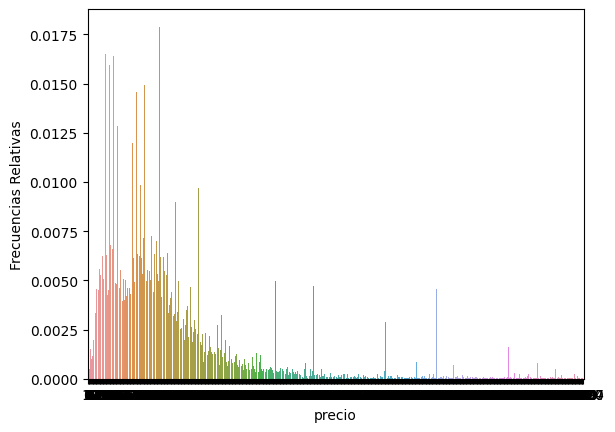

In [40]:
i = respuesta[0]
print("*************************************************")
print("Variable = "+i)
print("*************************************************")
# 1. La tabla de frecuencias de la variable i
pct = pd.DataFrame(data[i].value_counts(normalize=True))
pct.columns = ['Frecuencias Relativas']
pct["Frecuencias Absolutas"] = data[i].value_counts()
print(pct)

# 2. Barplot de la variable i
sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
plt.show()

# # 3. Pieplot de la variable i
# frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
# labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
# colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
# plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
# plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5064\3061592878.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


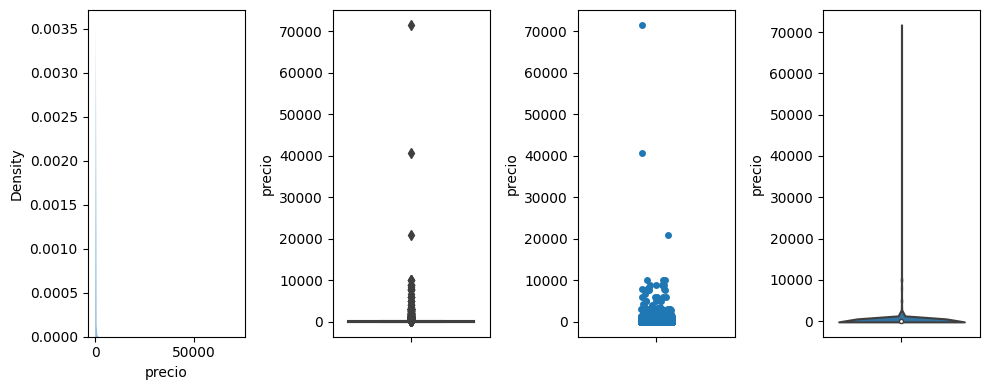

In [41]:
# Histograma de densidad, boxplot, stripchart y violin plot:
for i in respuesta:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i,ax=axs[1])
    sns.stripplot(y= i,data=data,ax=axs[2])
    sns.violinplot(data=data, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

### Explorar todas las variables cuantitativas y sus correlaciones

In [42]:
# Identificar variables explicativas cuantitativas excepto la respuesta
tipos_variables = pd.DataFrame(data.drop(respuesta[0], axis=1).dtypes)
(tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')

nombre            False
casero            False
distrito          False
zona              False
latitud            True
longitud           True
tipo              False
min_noches         True
num_reseñas        True
ult_reseña        False
reseñas_mes       False
disponibilidad     True
licencia          False
Name: 0, dtype: bool

In [43]:
# Identificar las variables cuantitativas. Juntamos los dos pasos anteriores:
var_num = data.drop(respuesta[0], axis=1).columns[(tipos_variables[0]=='int64') |
                                                        (tipos_variables[0]=='float64')]
pd.DataFrame(var_num)

,0
0,latitud
1,longitud
2,min_noches
3,num_reseñas
4,disponibilidad


In [44]:
#eliminar variables
# Eliminar variables (columnas)
col_eliminar = ['latitud', 'longitud']
var_num = var_num.drop(col_eliminar)
var_num

Index(['min_noches', 'num_reseñas', 'disponibilidad'], dtype='object')

In [45]:
# Estadístico descriptivos:

# Medidas de centralidad: Media y mediana
media = data[var_num].mean()
mediana = data[var_num].median()
maximo = data[var_num].max()
minimo = data[var_num].min()
Estadisticos_descriptivos = pd.DataFrame({'Media': media, 'Mediana': mediana, 'Maximo': maximo, 'Minimo': minimo})

# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
desv = data[var_num].std()
q1 = data[var_num].quantile(0.25)
q3 = data[var_num].quantile(0.75)
iqr = q3-q1
Estadisticos_descriptivos['Desviación Estándar'] = desv
Estadisticos_descriptivos['Cuartil 1'] = q1
Estadisticos_descriptivos['Cuartil 3'] = q3
Estadisticos_descriptivos['IQR'] = iqr

# Error estándar y intervalos de confianza de la media al 95% y 99%
Estadisticos_descriptivos['n'] = len(data) # numero de observaciones
Estadisticos_descriptivos['Error Estandar'] = desv/np.sqrt(len(data)) # numero de observaciones
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar'] 
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC lower 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar']
Estadisticos_descriptivos['IC upper 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']

Estadisticos_descriptivos

,Media,Mediana,Maximo,Minimo,Desviación Estándar,Cuartil 1,Cuartil 3,IQR,n,Error Estandar,IC lower 95%,IC upper 95%
min_noches,7.217430,2.0,1125,1,34.128424,1.0,3.0,2.0,21239,0.234180,6.758438,7.676422
num_reseñas,42.764396,10.0,889,0,78.737076,1.0,47.0,46.0,21239,0.540272,41.705463,43.823328
disponibilidad,166.416969,161.0,365,0,134.134405,22.0,297.0,275.0,21239,0.920393,164.612999,168.220938


C:\Users\Admin\AppData\Local\Temp\ipykernel_5064\3142683713.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


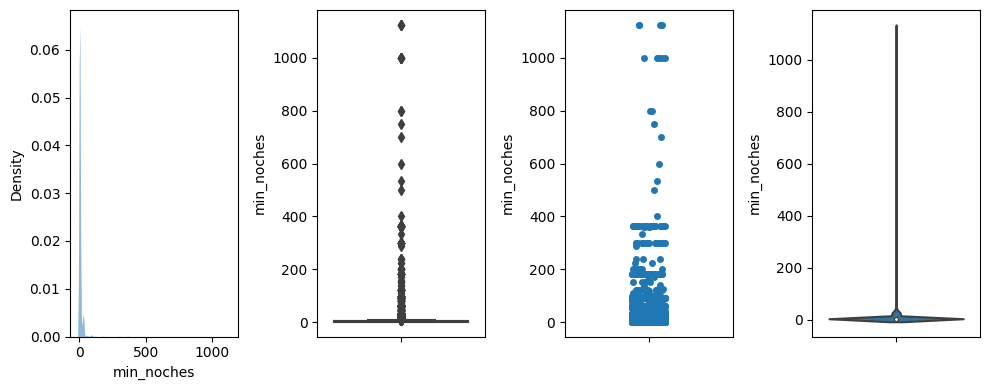

C:\Users\Admin\AppData\Local\Temp\ipykernel_5064\3142683713.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


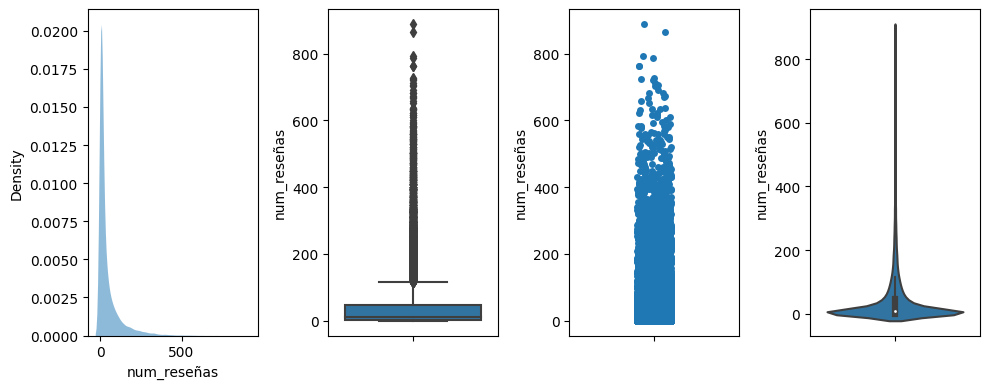

C:\Users\Admin\AppData\Local\Temp\ipykernel_5064\3142683713.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


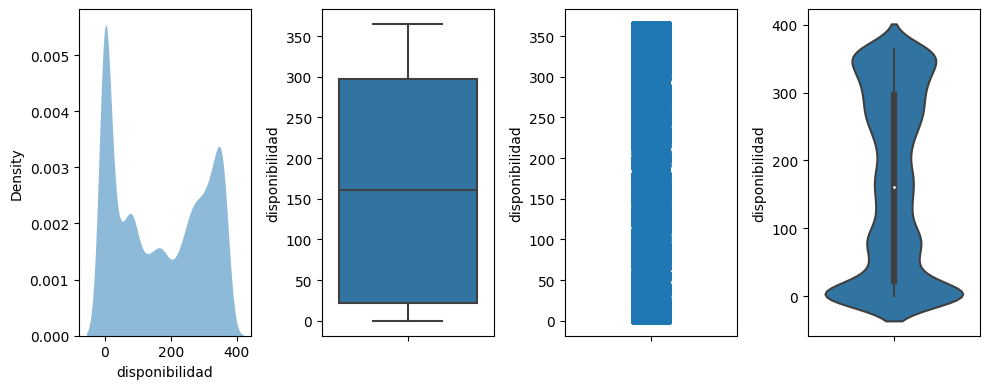

In [46]:
# Histograma de densidad, boxplot, stripchart y violin plot:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i,ax=axs[1])
    sns.stripplot(y= i,data=data,ax=axs[2])
    sns.violinplot(data=data, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

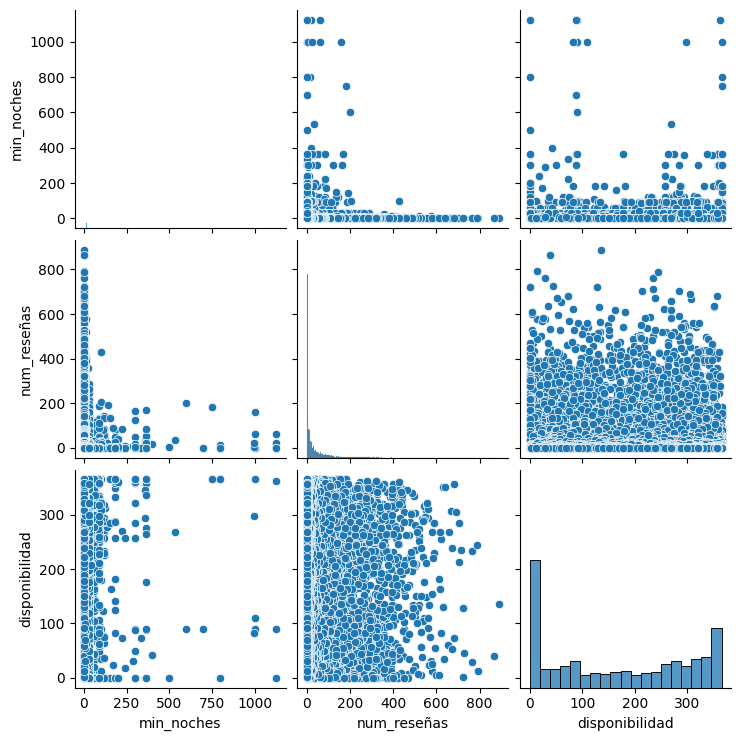

In [47]:
# Matrixplot
# seaborn
sns.pairplot(data[var_num])
plt.show()

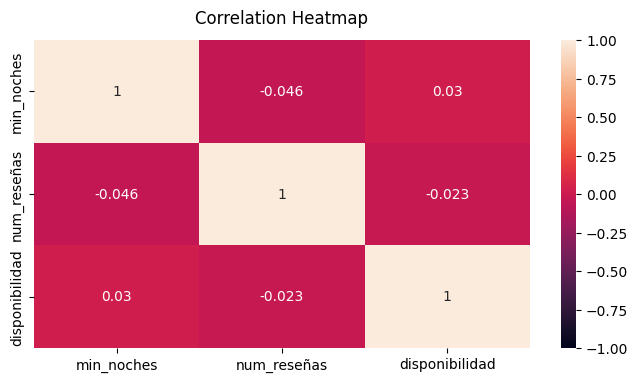

In [48]:
# Correlograma:
X = data[var_num]

# Increase the size of the heatmap.
plt.figure(figsize=(8, 4))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

### Explorar todas las variables cualitativas

In [49]:
# Identificar las variables cualitativas. Juntamos los dos pasos anteriores:
var_cual = data.drop(respuesta[0], axis=1).columns[tipos_variables[0]=='object']
pd.DataFrame(var_cual)

,0
0,nombre
1,casero
2,distrito
3,zona
4,tipo
5,ult_reseña
6,reseñas_mes
7,licencia


In [50]:
#eliminar variables
# Eliminar variables (columnas)
col_eliminar = ['nombre', 'casero', 'ult_reseña', 'licencia']
var_cual = var_cual.drop(col_eliminar)
var_cual

Index(['distrito', 'zona', 'tipo', 'reseñas_mes'], dtype='object')

*************************************************
Variable = distrito
*************************************************
                       Frecuencias Relativas  Frecuencias Absolutas
distrito                                                           
Centro                              0.444418                   9439
Salamanca                           0.067800                   1440
Chamberí                            0.061961                   1316
Arganzuela                          0.052639                   1118
Tetuán                              0.048072                   1021
Retiro                              0.036395                    773
Carabanchel                         0.035642                    757
Ciudad Lineal                       0.032534                    691
Chamartín                           0.029380                    624
Puente de Vallecas                  0.027967                    594
Moncloa - Aravaca                   0.027355                    

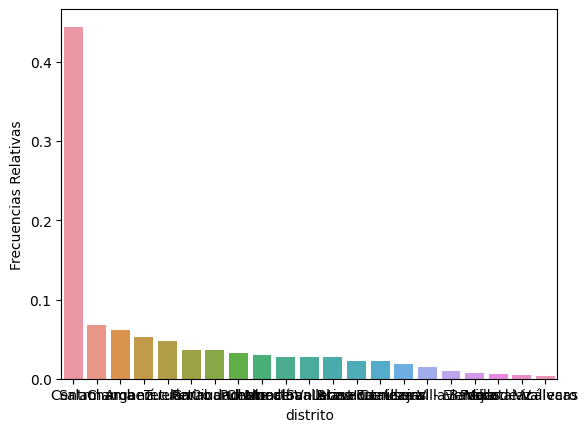

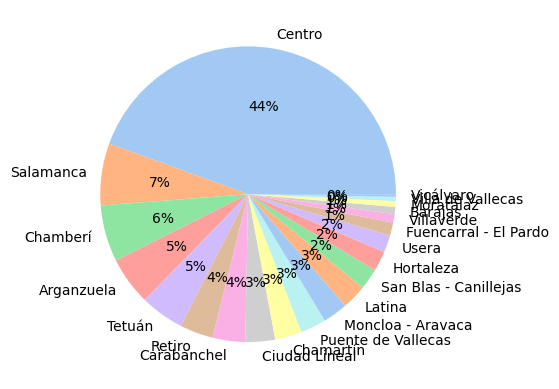

*************************************************
*************************************************
*************************************************
Variable = zona
*************************************************
             Frecuencias Relativas  Frecuencias Absolutas
zona                                                     
Embajadores               0.121239                   2575
Universidad               0.094967                   2017
Palacio                   0.079100                   1680
Sol                       0.055888                   1187
Justicia                  0.049390                   1049
...                            ...                    ...
Palomas                   0.000330                      7
Corralejos                0.000282                      6
Valdemarín                0.000235                      5
El Pardo                  0.000047                      1
Horcajo                   0.000047                      1

[126 rows x 2 columns]


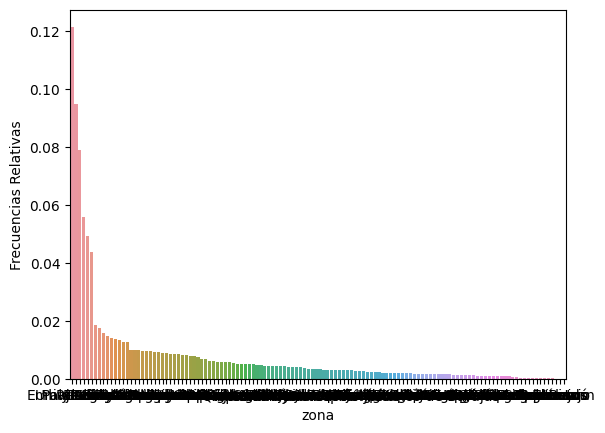

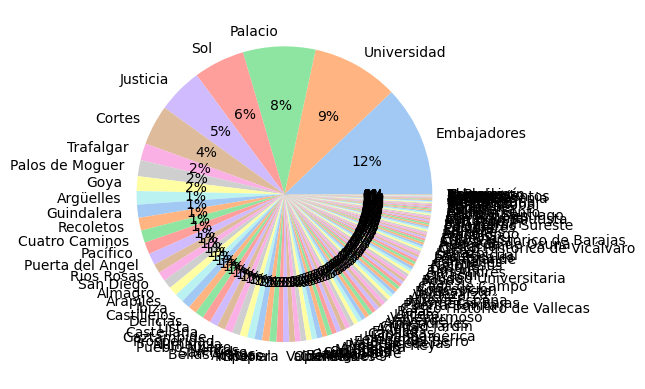

*************************************************
*************************************************
*************************************************
Variable = tipo
*************************************************
                 Frecuencias Relativas  Frecuencias Absolutas
tipo                                                         
Entire home/apt               0.647441                  13751
Private room                  0.333067                   7074
Shared room                   0.013654                    290
Hotel room                    0.005838                    124


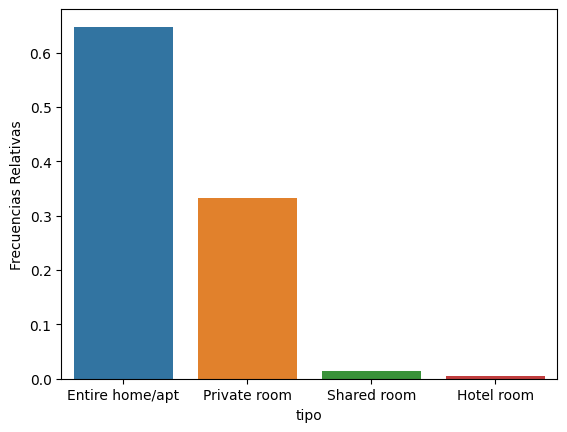

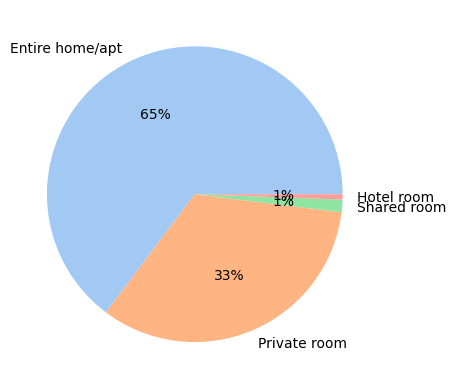

*************************************************
*************************************************
*************************************************
Variable = reseñas_mes
*************************************************
             Frecuencias Relativas  Frecuencias Absolutas
reseñas_mes                                              
0                         0.191676                   4071
0.02                      0.016291                    346
1.0                       0.015349                    326
0.04                      0.010923                    232
0.03                      0.010876                    231
...                            ...                    ...
7.33                      0.000047                      1
9.27                      0.000047                      1
6.11                      0.000047                      1
8.12                      0.000047                      1
6.58                      0.000047                      1

[890 rows x 2 columns]

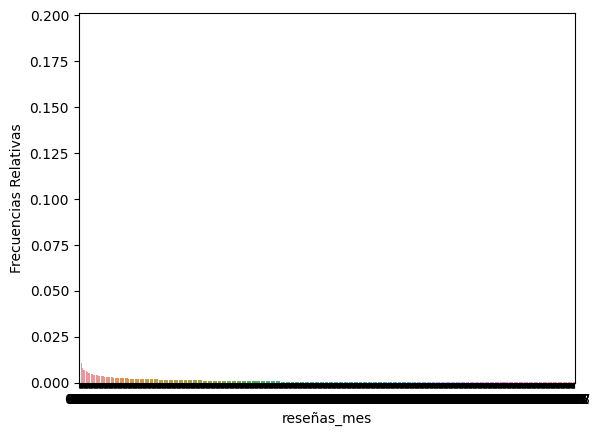

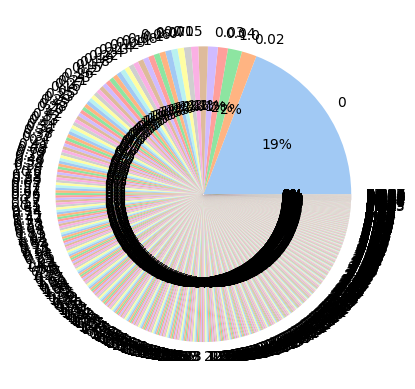

*************************************************
*************************************************


In [51]:
# gráficos y tablas de frecuencias de todas las variables cualitativas:
for i in var_cual:
    
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(data[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = data[i].value_counts()
    print(pct)
    
    # 2. Barplot de la variable i
    sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
    plt.show()
    
    # 3. Pieplot de la variable i
    frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
    labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
    colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
    plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
    plt.show()
    
    print("*************************************************")
    print("*************************************************")

## Exploración multivariada

-  (no aplica, variable de salida numerica)

# Selección de datos de entrada y salida

## Sustituir OBJECT por INT

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21239 entries, 0 to 21238
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre          21239 non-null  object 
 1   casero          21239 non-null  object 
 2   distrito        21239 non-null  object 
 3   zona            21239 non-null  object 
 4   latitud         21239 non-null  float64
 5   longitud        21239 non-null  float64
 6   tipo            21239 non-null  object 
 7   precio          21239 non-null  int64  
 8   min_noches      21239 non-null  int64  
 9   num_reseñas     21239 non-null  int64  
 10  ult_reseña      21239 non-null  object 
 11  reseñas_mes     21239 non-null  object 
 12  disponibilidad  21239 non-null  int64  
 13  licencia        21239 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 2.3+ MB


In [53]:
#copiar el data original
X_tot = data.copy()
# obtener todas las variables de entrada sin la salida
X_tot = data.drop(respuesta[0], axis=1) 
# eliminar algunas variables de entrada
del(X_tot['nombre'])
del(X_tot['casero'])
del(X_tot['latitud'])
del(X_tot['longitud'])
#mostrar las variables
X_tot.dtypes

distrito          object
zona              object
tipo              object
min_noches         int64
num_reseñas        int64
ult_reseña        object
reseñas_mes       object
disponibilidad     int64
licencia          object
dtype: object

In [54]:
# variable de salida, el precio de la vivienda
y = data[respuesta[0]] 
y

0         90
1         31
2         92
3         29
4         98
        ... 
21234     74
21235     41
21236    169
21237    146
21238    167
Name: precio, Length: 21239, dtype: int64

### distrito

In [55]:
#obtener una lista con los valores de los "tipos"
lista_distrito = X_tot['distrito'].value_counts() 
lista_distrito = lista_distrito.index.values.tolist() 
lista_distrito.sort()
lista_distrito

['Arganzuela',
 'Barajas',
 'Carabanchel',
 'Centro',
 'Chamartín',
 'Chamberí',
 'Ciudad Lineal',
 'Fuencarral - El Pardo',
 'Hortaleza',
 'Latina',
 'Moncloa - Aravaca',
 'Moratalaz',
 'Puente de Vallecas',
 'Retiro',
 'Salamanca',
 'San Blas - Canillejas',
 'Tetuán',
 'Usera',
 'Vicálvaro',
 'Villa de Vallecas',
 'Villaverde']

In [56]:
#crear una lista con los valores de los indices
lista_n_distrito = []
for i in range(len(lista_distrito)):
    lista_n_distrito.append(i)

In [57]:
# Creando un diccionario de los valores de los distritos y los valores del indice
dicc_distrito = {lista_distrito:lista_n_distrito for (lista_distrito,lista_n_distrito) in zip(lista_distrito,lista_n_distrito)}
print(dicc_distrito)

{'Arganzuela': 0, 'Barajas': 1, 'Carabanchel': 2, 'Centro': 3, 'Chamartín': 4, 'Chamberí': 5, 'Ciudad Lineal': 6, 'Fuencarral - El Pardo': 7, 'Hortaleza': 8, 'Latina': 9, 'Moncloa - Aravaca': 10, 'Moratalaz': 11, 'Puente de Vallecas': 12, 'Retiro': 13, 'Salamanca': 14, 'San Blas - Canillejas': 15, 'Tetuán': 16, 'Usera': 17, 'Vicálvaro': 18, 'Villa de Vallecas': 19, 'Villaverde': 20}


In [58]:
#reemplazar los valores en el DF de los tipos por el indice (para que sea numerico)
X_tot['distrito'].replace(dicc_distrito, inplace=True)
X_tot['distrito'].value_counts()

distrito
3     9439
14    1440
5     1316
0     1118
16    1021
13     773
2      757
6      691
4      624
12     594
10     581
9      575
15     487
8      465
17     401
7      301
20     198
1      165
11     134
19      99
18      60
Name: count, dtype: int64

### zona

In [59]:
#obtener una lista con los valores de los "tipos"
lista_zona = X_tot['zona'].value_counts() 
lista_zona = lista_zona.index.values.tolist() 
lista_zona.sort()
lista_zona

['Abrantes',
 'Acacias',
 'Adelfas',
 'Aeropuerto',
 'Aguilas',
 'Alameda de Osuna',
 'Almagro',
 'Almenara',
 'Almendrales',
 'Aluche',
 'Ambroz',
 'Amposta',
 'Apostol Santiago',
 'Arapiles',
 'Aravaca',
 'Arcos',
 'Argüelles',
 'Atocha',
 'Bellas Vistas',
 'Berruguete',
 'Buenavista',
 'Butarque',
 'Campamento',
 'Canillas',
 'Canillejas',
 'Casa de Campo',
 'Casco Histórico de Barajas',
 'Casco Histórico de Vallecas',
 'Casco Histórico de Vicálvaro',
 'Castellana',
 'Castilla',
 'Castillejos',
 'Chopera',
 'Ciudad Jardín',
 'Ciudad Universitaria',
 'Colina',
 'Comillas',
 'Concepción',
 'Corralejos',
 'Cortes',
 'Costillares',
 'Cuatro Caminos',
 'Cuatro Vientos',
 'Cármenes',
 'Delicias',
 'El Goloso',
 'El Pardo',
 'El Plantío',
 'El Viso',
 'Embajadores',
 'Entrevías',
 'Estrella',
 'Fontarrón',
 'Fuente del Berro',
 'Gaztambide',
 'Goya',
 'Guindalera',
 'Hellín',
 'Hispanoamérica',
 'Horcajo',
 'Ibiza',
 'Imperial',
 'Jerónimos',
 'Justicia',
 'La Paz',
 'Legazpi',
 'Lista',
 

In [60]:
#crear una lista con los valores de los indices
lista_n_zona = []
for i in range(len(lista_zona)):
    lista_n_zona.append(i)

In [61]:
# Creando un diccionario de los valores de los distritos y los valores del indice
dicc_zona = {lista_zona:lista_n_zona for (lista_zona,lista_n_zona) in zip(lista_zona,lista_n_zona)}
print(dicc_zona)

{'Abrantes': 0, 'Acacias': 1, 'Adelfas': 2, 'Aeropuerto': 3, 'Aguilas': 4, 'Alameda de Osuna': 5, 'Almagro': 6, 'Almenara': 7, 'Almendrales': 8, 'Aluche': 9, 'Ambroz': 10, 'Amposta': 11, 'Apostol Santiago': 12, 'Arapiles': 13, 'Aravaca': 14, 'Arcos': 15, 'Argüelles': 16, 'Atocha': 17, 'Bellas Vistas': 18, 'Berruguete': 19, 'Buenavista': 20, 'Butarque': 21, 'Campamento': 22, 'Canillas': 23, 'Canillejas': 24, 'Casa de Campo': 25, 'Casco Histórico de Barajas': 26, 'Casco Histórico de Vallecas': 27, 'Casco Histórico de Vicálvaro': 28, 'Castellana': 29, 'Castilla': 30, 'Castillejos': 31, 'Chopera': 32, 'Ciudad Jardín': 33, 'Ciudad Universitaria': 34, 'Colina': 35, 'Comillas': 36, 'Concepción': 37, 'Corralejos': 38, 'Cortes': 39, 'Costillares': 40, 'Cuatro Caminos': 41, 'Cuatro Vientos': 42, 'Cármenes': 43, 'Delicias': 44, 'El Goloso': 45, 'El Pardo': 46, 'El Plantío': 47, 'El Viso': 48, 'Embajadores': 49, 'Entrevías': 50, 'Estrella': 51, 'Fontarrón': 52, 'Fuente del Berro': 53, 'Gaztambide'

In [62]:
#reemplazar los valores en el DF de los tipos por el indice (para que sea numerico)
X_tot['zona'].replace(dicc_zona, inplace=True)
X_tot['zona'].value_counts()

zona
49     2575
115    2017
81     1680
112    1187
63     1049
       ... 
82        7
38        6
118       5
46        1
59        1
Name: count, Length: 126, dtype: int64

### tipo

In [63]:
#obtener una lista con los valores de los "tipos"
lista_tipo = X_tot['tipo'].value_counts() 
lista_tipo = lista_tipo.index.values.tolist() 
lista_tipo.sort()
lista_tipo

['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

In [64]:
#crear una lista con los valores de los indices
lista_n_tipo = []
for i in range(len(lista_tipo)):
    lista_n_tipo.append(i)

In [65]:
# Creando un diccionario de los valores de los distritos y los valores del indice
dicc_tipo = {lista_tipo:lista_n_tipo for (lista_tipo,lista_n_tipo) in zip(lista_tipo,lista_n_tipo)}
print(dicc_tipo)

{'Entire home/apt': 0, 'Hotel room': 1, 'Private room': 2, 'Shared room': 3}


In [66]:
#reemplazar los valores en el DF de los tipos por el indice (para que sea numerico)
X_tot['tipo'].replace(dicc_tipo, inplace=True)
X_tot['tipo'].value_counts()

tipo
0    13751
2     7074
3      290
1      124
Name: count, dtype: int64

### ult_reseña

In [67]:
#obtener una lista con los valores de los "tipos"
lista_ult_reseña = X_tot['ult_reseña'].value_counts() 
lista_ult_reseña = lista_ult_reseña.index.values.tolist() 
lista_ult_reseña.sort()
lista_ult_reseña

['2012-08-04',
 '2012-09-14',
 '2013-05-06',
 '2013-05-21',
 '2013-05-31',
 '2013-07-10',
 '2013-09-19',
 '2014-04-21',
 '2014-05-19',
 '2014-06-06',
 '2014-08-01',
 '2014-09-28',
 '2014-09-29',
 '2014-11-08',
 '2014-12-08',
 '2015-01-17',
 '2015-02-10',
 '2015-03-13',
 '2015-03-22',
 '2015-04-06',
 '2015-05-03',
 '2015-05-05',
 '2015-05-06',
 '2015-05-11',
 '2015-05-12',
 '2015-05-21',
 '2015-05-30',
 '2015-06-09',
 '2015-06-19',
 '2015-06-23',
 '2015-06-28',
 '2015-07-13',
 '2015-07-19',
 '2015-07-26',
 '2015-07-29',
 '2015-07-30',
 '2015-07-31',
 '2015-08-01',
 '2015-08-11',
 '2015-08-15',
 '2015-08-17',
 '2015-08-19',
 '2015-08-20',
 '2015-08-24',
 '2015-08-26',
 '2015-08-31',
 '2015-09-01',
 '2015-09-03',
 '2015-09-08',
 '2015-09-11',
 '2015-09-12',
 '2015-09-14',
 '2015-09-16',
 '2015-09-21',
 '2015-09-23',
 '2015-09-27',
 '2015-10-03',
 '2015-10-14',
 '2015-10-16',
 '2015-10-21',
 '2015-11-01',
 '2015-11-03',
 '2015-11-09',
 '2015-11-21',
 '2015-11-22',
 '2015-12-06',
 '2015-12-

In [68]:
#crear una lista con los valores de los indices
lista_n_ult_reseña = []
for i in range(len(lista_ult_reseña)):
    lista_n_ult_reseña.append(i)

In [69]:
# Creando un diccionario de los valores de los distritos y los valores del indice
dicc_ult_reseña = {lista_ult_reseña:lista_n_ult_reseña for (lista_ult_reseña,lista_n_ult_reseña) in zip(lista_ult_reseña,lista_n_ult_reseña)}
print(dicc_ult_reseña)

{'2012-08-04': 0, '2012-09-14': 1, '2013-05-06': 2, '2013-05-21': 3, '2013-05-31': 4, '2013-07-10': 5, '2013-09-19': 6, '2014-04-21': 7, '2014-05-19': 8, '2014-06-06': 9, '2014-08-01': 10, '2014-09-28': 11, '2014-09-29': 12, '2014-11-08': 13, '2014-12-08': 14, '2015-01-17': 15, '2015-02-10': 16, '2015-03-13': 17, '2015-03-22': 18, '2015-04-06': 19, '2015-05-03': 20, '2015-05-05': 21, '2015-05-06': 22, '2015-05-11': 23, '2015-05-12': 24, '2015-05-21': 25, '2015-05-30': 26, '2015-06-09': 27, '2015-06-19': 28, '2015-06-23': 29, '2015-06-28': 30, '2015-07-13': 31, '2015-07-19': 32, '2015-07-26': 33, '2015-07-29': 34, '2015-07-30': 35, '2015-07-31': 36, '2015-08-01': 37, '2015-08-11': 38, '2015-08-15': 39, '2015-08-17': 40, '2015-08-19': 41, '2015-08-20': 42, '2015-08-24': 43, '2015-08-26': 44, '2015-08-31': 45, '2015-09-01': 46, '2015-09-03': 47, '2015-09-08': 48, '2015-09-11': 49, '2015-09-12': 50, '2015-09-14': 51, '2015-09-16': 52, '2015-09-21': 53, '2015-09-23': 54, '2015-09-27': 55, '

In [70]:
#reemplazar los valores en el DF de los tipos por el indice (para que sea numerico)
X_tot['ult_reseña'].replace(dicc_ult_reseña, inplace=True)
X_tot['ult_reseña'].value_counts()

ult_reseña
1742    4071
1728     877
1714     735
1721     674
1715     563
        ... 
1163       1
1129       1
302        1
284        1
1392       1
Name: count, Length: 1743, dtype: int64

### reseñas_mes

In [71]:
# #convertir a numerico
# X_tot['reseñas_mes'] = X_tot['reseñas_mes'].astype('float')

In [72]:
#obtener una lista con los valores de los "tipos"
lista_reseñas_mes = X_tot['reseñas_mes'].value_counts() 
lista_reseñas_mes = lista_reseñas_mes.index.values.tolist() 
# lista_reseñas_mes.sort()
lista_reseñas_mes

['0',
 0.02,
 1.0,
 0.04,
 0.03,
 0.05,
 0.01,
 0.07,
 2.0,
 0.06,
 0.1,
 0.08,
 0.11,
 0.09,
 0.12,
 0.14,
 0.13,
 0.24,
 0.22,
 0.19,
 0.18,
 0.17,
 0.15,
 0.2,
 0.26,
 0.23,
 0.21,
 0.27,
 0.16,
 0.3,
 0.25,
 0.33,
 0.29,
 0.45,
 0.28,
 3.0,
 0.42,
 0.32,
 0.43,
 0.44,
 0.31,
 0.36,
 0.38,
 0.37,
 0.4,
 0.41,
 0.49,
 0.68,
 0.79,
 0.39,
 0.46,
 0.59,
 0.34,
 1.18,
 0.6,
 0.72,
 0.58,
 0.83,
 0.65,
 0.57,
 0.51,
 0.67,
 0.56,
 0.75,
 0.7,
 0.52,
 0.5,
 0.61,
 0.54,
 0.74,
 0.35,
 0.47,
 1.54,
 0.78,
 0.53,
 0.64,
 0.48,
 0.81,
 1.13,
 1.02,
 1.04,
 0.82,
 0.94,
 0.73,
 0.76,
 1.11,
 0.98,
 0.95,
 0.55,
 0.69,
 1.3,
 1.44,
 4.0,
 0.66,
 0.8,
 0.97,
 0.9,
 1.29,
 0.77,
 0.62,
 1.09,
 1.53,
 1.08,
 0.89,
 0.85,
 1.03,
 1.72,
 1.36,
 1.56,
 1.2,
 0.99,
 1.14,
 1.01,
 0.86,
 1.22,
 0.63,
 0.71,
 1.23,
 1.67,
 1.31,
 1.94,
 1.17,
 1.43,
 1.58,
 1.42,
 0.84,
 1.57,
 1.06,
 1.28,
 1.07,
 1.15,
 1.4,
 1.27,
 1.25,
 1.65,
 1.68,
 1.1,
 0.96,
 1.7,
 0.88,
 1.33,
 2.73,
 1.26,
 1.38,
 1.82,
 0.9

In [73]:
#crear una lista con los valores de los indices
lista_n_reseñas_mes = []
for i in range(len(lista_reseñas_mes)):
    lista_n_reseñas_mes.append(i)

In [74]:
# Creando un diccionario de los valores de los distritos y los valores del indice
dicc_reseñas_mes = {lista_reseñas_mes:lista_n_reseñas_mes for (lista_reseñas_mes,lista_n_reseñas_mes) in zip(lista_reseñas_mes,lista_n_reseñas_mes)}
print(dicc_reseñas_mes)

{'0': 0, 0.02: 1, 1.0: 2, 0.04: 3, 0.03: 4, 0.05: 5, 0.01: 6, 0.07: 7, 2.0: 8, 0.06: 9, 0.1: 10, 0.08: 11, 0.11: 12, 0.09: 13, 0.12: 14, 0.14: 15, 0.13: 16, 0.24: 17, 0.22: 18, 0.19: 19, 0.18: 20, 0.17: 21, 0.15: 22, 0.2: 23, 0.26: 24, 0.23: 25, 0.21: 26, 0.27: 27, 0.16: 28, 0.3: 29, 0.25: 30, 0.33: 31, 0.29: 32, 0.45: 33, 0.28: 34, 3.0: 35, 0.42: 36, 0.32: 37, 0.43: 38, 0.44: 39, 0.31: 40, 0.36: 41, 0.38: 42, 0.37: 43, 0.4: 44, 0.41: 45, 0.49: 46, 0.68: 47, 0.79: 48, 0.39: 49, 0.46: 50, 0.59: 51, 0.34: 52, 1.18: 53, 0.6: 54, 0.72: 55, 0.58: 56, 0.83: 57, 0.65: 58, 0.57: 59, 0.51: 60, 0.67: 61, 0.56: 62, 0.75: 63, 0.7: 64, 0.52: 65, 0.5: 66, 0.61: 67, 0.54: 68, 0.74: 69, 0.35: 70, 0.47: 71, 1.54: 72, 0.78: 73, 0.53: 74, 0.64: 75, 0.48: 76, 0.81: 77, 1.13: 78, 1.02: 79, 1.04: 80, 0.82: 81, 0.94: 82, 0.73: 83, 0.76: 84, 1.11: 85, 0.98: 86, 0.95: 87, 0.55: 88, 0.69: 89, 1.3: 90, 1.44: 91, 4.0: 92, 0.66: 93, 0.8: 94, 0.97: 95, 0.9: 96, 1.29: 97, 0.77: 98, 0.62: 99, 1.09: 100, 1.53: 101, 1.

In [75]:
#reemplazar los valores en el DF de los tipos por el indice (para que sea numerico)
X_tot['reseñas_mes'].replace(dicc_reseñas_mes, inplace=True)
X_tot['reseñas_mes'].value_counts()

reseñas_mes
0.0      4071
1.0       346
2.0       326
3.0       232
4.0       231
         ... 
885.0       1
886.0       1
887.0       1
888.0       1
889.0       1
Name: count, Length: 890, dtype: int64

### licencia

In [76]:
#obtener una lista con los valores de los "tipos"
lista_licencia = X_tot['licencia'].value_counts() 
lista_licencia = lista_licencia.index.values.tolist() 
lista_licencia.sort()
lista_licencia

['(VT-4185)',
 '******',
 '+34666374610',
 '000/EnTramite',
 '0000000',
 '000000000',
 '000000000000',
 '00001',
 '00002',
 '00003',
 '00004',
 '00352648',
 '00399835H',
 '00824441Y',
 '02548586w',
 '02610702h',
 '03/068662.9/17',
 '03/068669.9/17',
 '03/068679.9/17',
 '03/068692.9/17',
 '03/1455109/17',
 '03/151297 .9/17',
 '03/167356.9/17',
 '03/175031.9/17',
 '03/195886.9/16',
 '03/313236.9/17',
 '03/313255.9/17',
 '03/313275.9/17',
 '03/313297.9/17',
 '03/390249.9/17',
 '03/404186.9/17',
 '0306513VK4700E0003RB',
 '04.05.007',
 '06/014204.9/17',
 '06/017892.9/17',
 '06712117G',
 '09/014938.9/20',
 '09/022316.9/20',
 '09/050162.9/19',
 '09/068721.9/18',
 '09/111541.9/23',
 '09/141085.9/19',
 '09/195263.9/23',
 '09/248317.9/20',
 '09/249659.9/22',
 '09/267684.9/20',
 '09/307440.9/21',
 '09/315554.9/18',
 '09/349976.9/20',
 '09/362184.9/20',
 '09/376765.9/19',
 '09/586838.9/19',
 '09/702969.9/20',
 '09/711572.9/18 VT8697',
 '09/769977.9/20',
 '09/893274.9/21',
 '09014918.920',
 '097250

In [77]:
#crear una lista con los valores de los indices
lista_n_licencia = []
for i in range(len(lista_licencia)):
    lista_n_licencia.append(i)

In [78]:
# Creando un diccionario de los valores de los distritos y los valores del indice
dicc_licencia = {lista_licencia:lista_n_licencia for (lista_licencia,lista_n_licencia) in zip(lista_licencia,lista_n_licencia)}
print(dicc_licencia)

{'(VT-4185)': 0, '******': 1, '+34666374610': 2, '000/EnTramite': 3, '0000000': 4, '000000000': 5, '000000000000': 6, '00001': 7, '00002': 8, '00003': 9, '00004': 10, '00352648': 11, '00399835H': 12, '00824441Y': 13, '02548586w': 14, '02610702h': 15, '03/068662.9/17': 16, '03/068669.9/17': 17, '03/068679.9/17': 18, '03/068692.9/17': 19, '03/1455109/17': 20, '03/151297 .9/17': 21, '03/167356.9/17': 22, '03/175031.9/17': 23, '03/195886.9/16': 24, '03/313236.9/17': 25, '03/313255.9/17': 26, '03/313275.9/17': 27, '03/313297.9/17': 28, '03/390249.9/17': 29, '03/404186.9/17': 30, '0306513VK4700E0003RB': 31, '04.05.007': 32, '06/014204.9/17': 33, '06/017892.9/17': 34, '06712117G': 35, '09/014938.9/20': 36, '09/022316.9/20': 37, '09/050162.9/19': 38, '09/068721.9/18': 39, '09/111541.9/23': 40, '09/141085.9/19': 41, '09/195263.9/23': 42, '09/248317.9/20': 43, '09/249659.9/22': 44, '09/267684.9/20': 45, '09/307440.9/21': 46, '09/315554.9/18': 47, '09/349976.9/20': 48, '09/362184.9/20': 49, '09/3

In [79]:
#reemplazar los valores en el DF de los tipos por el indice (para que sea numerico)
X_tot['licencia'].replace(dicc_licencia, inplace=True)
X_tot['licencia'].value_counts()

licencia
2294    18494
387        49
208        20
1082       15
272        13
        ...  
1519        1
1513        1
1390        1
1203        1
172         1
Name: count, Length: 2322, dtype: int64

# Feature selection - selección de variables

In [80]:
#comprobar los tipos de datos
X_tot.dtypes

distrito            int64
zona                int64
tipo                int64
min_noches          int64
num_reseñas         int64
ult_reseña          int64
reseñas_mes       float64
disponibilidad      int64
licencia            int64
dtype: object

## Mutual information

In [81]:
%%time
# pip install -U scikit-learn
#from sklearn.feature_selection import mutual_info_classif

a = mutual_info_classif(X_tot,y)
b = X_tot.columns
mutualinfo = pd.DataFrame(a,b,columns =["Mutual_Information"])
mutualinfo.sort_values(by=["Mutual_Information"],ascending = False).head(20)

CPU times: total: 1min 1s
Wall time: 14 s


,Mutual_Information
tipo,0.316835
distrito,0.182939
licencia,0.160465
disponibilidad,0.157497
zona,0.154522
ult_reseña,0.143452
min_noches,0.102076
reseñas_mes,0.096780
num_reseñas,0.069021


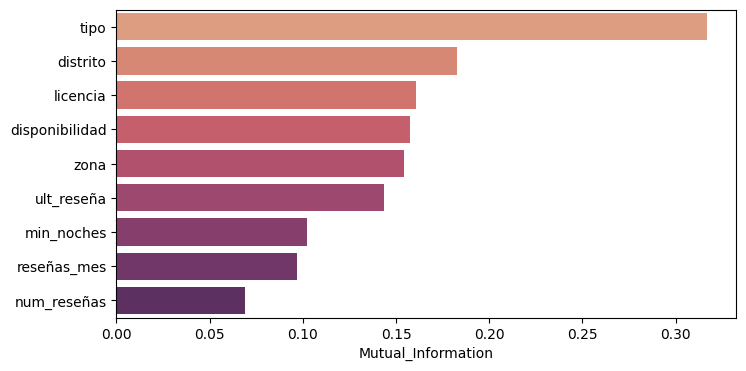

In [82]:
# Plot de la mutual information
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
sns.barplot(x = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False)["Mutual_Information"],
            y = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False).index,
            palette ="flare",
            data=mutualinfo)
plt.show()

## Ranking de correlación

In [83]:
#crear el DF 
X_num_tot = X_tot.copy()
#añadir la variable de salida al DF
X_num_tot['precio'] = y
X_num_tot.dtypes

distrito            int64
zona                int64
tipo                int64
min_noches          int64
num_reseñas         int64
ult_reseña          int64
reseñas_mes       float64
disponibilidad      int64
licencia            int64
precio              int64
dtype: object

In [84]:
# Correlacion en valor absoluta de la variable de salida
cor = X_num_tot.corr(method = 'spearman')
cor_target = abs(cor[respuesta])
cor_target = cor_target.sort_values(by = [respuesta[0]], ascending = 0)
cor_target

,precio
precio,1.000000
tipo,0.566785
disponibilidad,0.234595
licencia,0.193942
ult_reseña,0.125007
distrito,0.085055
min_noches,0.042186
zona,0.026935
num_reseñas,0.013475
reseñas_mes,0.009760


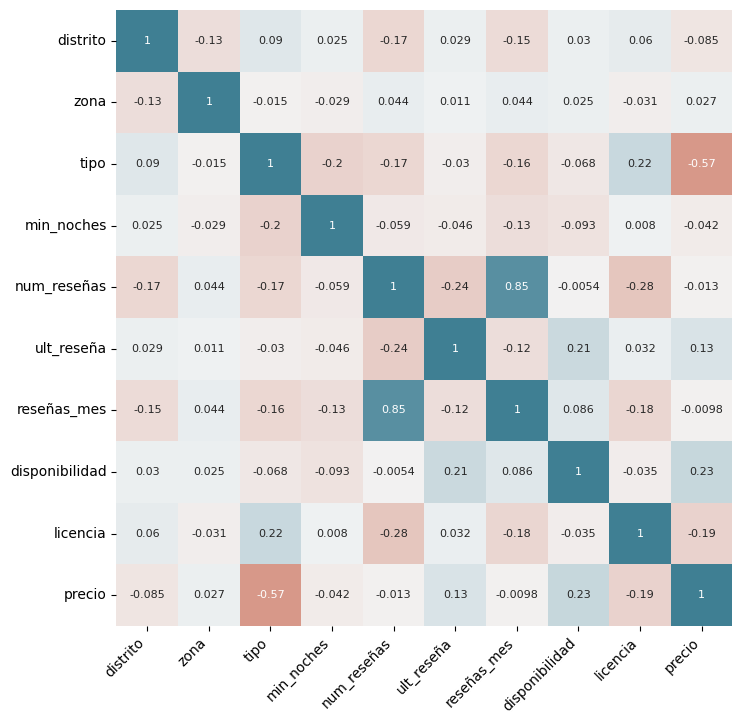

In [85]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(
    cor,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## Filtro multivariado - según BIC

In [86]:
#crear variables
y_ = y
X_ = X_tot

In [87]:
%%time
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

BIC_models = pd.DataFrame(0, index=range(len(X_.columns)-1), columns = ["Num_Variables","BIC"])
lnreg = LinearRegression()


# Calculo del BIC con la iteracion i-esima
for i in np.arange(1,len(X_.columns),1):
    # Aplicar el RFE con i-variables
    rfe = RFE(lnreg,n_features_to_select = i)
    rfe = rfe.fit(X_,y_)
    print(rfe.support_)
    print(rfe.ranking_)

    # Seleccionar las variables de entrada
    X_RFE = X_[X_.columns[rfe.support_]]
    X_RFE.head()

    # Calcular el modelo logistico con las variables seleccionadas
    lm_model_i = sm.OLS(y_, sm.add_constant(X_RFE)).fit()
    lm_model_i.summary()

    # Calcular el BIC del modelo logistico
    BIC_models.iloc[(i-1)] = [i,lm_model_i.bic]

[False False  True False False False False False False]
[2 6 1 3 9 7 4 5 8]
[ True False  True False False False False False False]
[1 5 1 2 8 6 3 4 7]
[ True False  True  True False False False False False]
[1 4 1 1 7 5 2 3 6]
[ True False  True  True False False  True False False]
[1 3 1 1 6 4 1 2 5]
[ True False  True  True False False  True  True False]
[1 2 1 1 5 3 1 1 4]
[ True  True  True  True False False  True  True False]
[1 1 1 1 4 2 1 1 3]
[ True  True  True  True False  True  True  True False]
[1 1 1 1 3 1 1 1 2]
[ True  True  True  True False  True  True  True  True]
[1 1 1 1 2 1 1 1 1]
CPU times: total: 438 ms
Wall time: 478 ms


In [88]:
# BIC de todos los modelos, ordenados por el menor BIC, ya que es el mejor modelo
#BIC_models.sort_values('BIC')
BIC_models.sort_values(by=['BIC'], ascending=True)

,Num_Variables,BIC
3,4,336036.896066
4,5,336037.048637
5,6,336046.950622
0,1,336049.240259
6,7,336053.042638
2,3,336055.281216
1,2,336058.141808
7,8,336061.563030


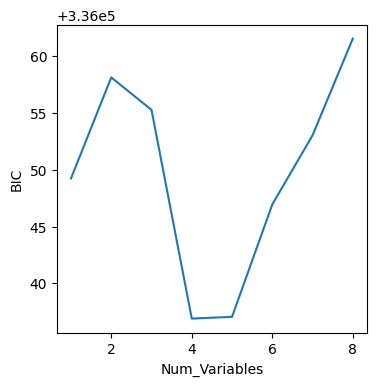

In [89]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.lineplot(data=BIC_models, x="Num_Variables", y="BIC")
plt.show()

In [90]:
# Numero de variables optimo:
n_variables = BIC_models["BIC"].idxmin()+1
print("El número de variables óptimo según el BIC es: ", n_variables)

El número de variables óptimo según el BIC es:  4


In [91]:
%%time
# Calculamos el modelo con el RFE con el numero de variables seleccionadas
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

lmreg = LinearRegression()
rfe = RFE(lmreg,n_features_to_select = n_variables)

rfe = rfe.fit(X_,y_)

CPU times: total: 62.5 ms
Wall time: 93 ms


In [92]:
# Seleccionar las variables de entrada del modelo de RFE
X_RFE_BIC = X_[X_.columns[rfe.support_]]
X_RFE_BIC.head()

,distrito,tipo,min_noches,reseñas_mes
0,4,2,4,75.0
1,9,2,4,37.0
2,3,0,5,24.0
3,0,2,3,53.0
4,3,0,2,113.0


In [93]:
# Calculo del modelo con las variables seleccionadas
lm_model_i = sm.OLS(y_, sm.add_constant(X_RFE_BIC)).fit()
lm_model_i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     20.82
Date:                Fri, 19 May 2023   Prob (F-statistic):           3.77e-17
Time:                        11:56:02   Log-Likelihood:            -1.6799e+05
No. Observations:               21239   AIC:                         3.360e+05
Df Residuals:                   21234   BIC:                         3.360e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         176.6946      9.130     19.353      0.000     158.799     194.590
distrito        0.3418      0.885      0.386      0.699      -1.393       2.077
tipo          -32.6279      4.682     -6.969      0.000     -41.804     -23.451
min_noches      0.4119      0.133      3.096      0.002       0.151       0.673
reseñas_mes    -0.1525      0.029     -5.326      0.000      -0.209      -0.096
==============================================================================
Omnibus:                    76648.378   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      46366894105.716
Skew:                          74.292   Prob(JB):                         0.00
Kurtosis:                    7239.875   Cond. No.                         424.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Filtro multivariado - según RFE

#### RFE con random forest

In [94]:
%%time
# import matplotlib.pyplot as plt
# from sklearn.svm import SVR
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification
# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestRegressor

# Create the RFE object and compute a cross-validated score.
#svc = SVR(kernel="linear")
#svc = AdaBoostRegressor()
svc = RandomForestRegressor(n_estimators=10)
# The "accuracy" scoring shows the proportion of correct classifications
from sklearn.ensemble import GradientBoostingClassifier
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=KFold(5),
    scoring='neg_mean_absolute_error',
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_, y_)

print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (neg_mean_absolute_error)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
# plt.errorbar(
#     range(min_features_to_select, len(rfecv.cv_results_) + min_features_to_select),
#     rfecv.cv_results_["mean_test_score"],
#     yerr=rfecv.cv_results_["std_test_score"],
# )
# plt.show()

Optimal number of features : 1
CPU times: total: 39.7 s
Wall time: 39.8 s


In [95]:
# Seleccionamos las variables con RFE-SVM
X_RFE_RF = X_.loc[:,rfecv.support_].copy()
X_RFE_RF.head() #a descartado las variables que no aparecen aqui

,ult_reseña
0,1625
1,478
2,1651
3,1720
4,1679


#### RFE con SVM

In [96]:
# %%time
# # import matplotlib.pyplot as plt
# # from sklearn.svm import SVR
# # from sklearn.model_selection import StratifiedKFold
# # from sklearn.feature_selection import RFECV
# # from sklearn.datasets import make_classification
# # from sklearn.model_selection import KFold


# # Create the RFE object and compute a cross-validated score.
# svc = SVR(kernel="linear")
# #svc = AdaBoostRegressor()
# #svc = RandomForestRegressor(n_estimators=10)
# # The "accuracy" scoring shows the proportion of correct classifications

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv = RFECV(
#     estimator=svc,
#     step=1,
#     cv=KFold(5),
#     scoring='neg_mean_absolute_error',
#     min_features_to_select=min_features_to_select,
# )
# rfecv.fit(X_, y_)

# print("Optimal number of features : %d" % rfecv.n_features_)

# # # Plot number of features VS. cross-validation scores
# # plt.figure()
# # plt.xlabel("Number of features selected")
# # plt.ylabel("Cross validation score (neg_mean_absolute_error)")
# # # plt.plot(
# # #     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
# # #     rfecv.grid_scores_,
# # # )
# # plt.errorbar(
# #     range(min_features_to_select, len(rfecv.cv_results_) + min_features_to_select),
# #     rfecv.cv_results_["mean_test_score"],
# #     yerr=rfecv.cv_results_["std_test_score"],
# # )
# # plt.show()

In [97]:
# # Seleccionamos las variables con RFE-SVM
# X_RFE_SVM = X_.loc[:,rfecv.support_].copy()
# X_RFE_SVM.head() # A descartado las variables que no aparecen aqui

## Filtro Multivariado - BORUTA

    - Boruta, mejora los problemas del RFE

### Boruta - sin estandarizar

In [119]:
%%time
# from boruta import BorutaPy

# definimos el random forest clasificador
randomForest = RandomForestRegressor(n_jobs = -1, max_depth = 4)
randomForest.fit(X_, y_)

# define Boruta feature selection
feature_selection = BorutaPy(randomForest, n_estimators = 'auto', verbose = 1, 
                             random_state = 16, max_iter= 200)

CPU times: total: 2.69 s
Wall time: 470 ms


In [1]:
# # Get relevant features
feature_selection.fit(np.array(X_), np.array(y_))